
# **The Telco customer churn data **

  This data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.
  https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Churn is when customers stop using a product or service. For example, if someone cancels their phone plan or stops using a streaming service, it's considered churn. Businesses pay close attention to churn because it's important to keep customers happy and prevent them from leaving, as gaining new customers can be more costly. Understanding why customers leave helps businesses improve and retain their customer base.

## I've conducted an analysis of the provided customer dataset.

The dataset contains information about both male and female customers.
A significant portion of the customers are not senior citizens.
Relationship Status:


## **Churn Analysis:**

The "Churn" column is crucial as it indicates whether a customer has left the service.
It's important to investigate factors that contribute to churn, such as tenure, service types, and additional features.


# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

# Loading the csv Dataset

In [ ]:
# Load the dataset
data = pd.read_csv(r"C:\Users\svani\Downloads\Random Forrest\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Cleaning
  Displaying the data by using Head

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Describing the Data For Analysis:

In [ ]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


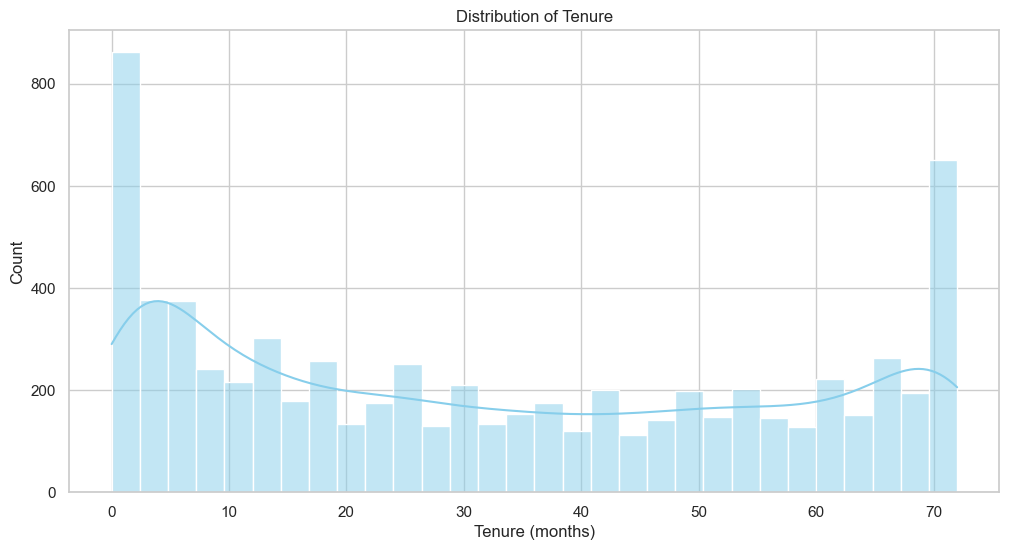

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()


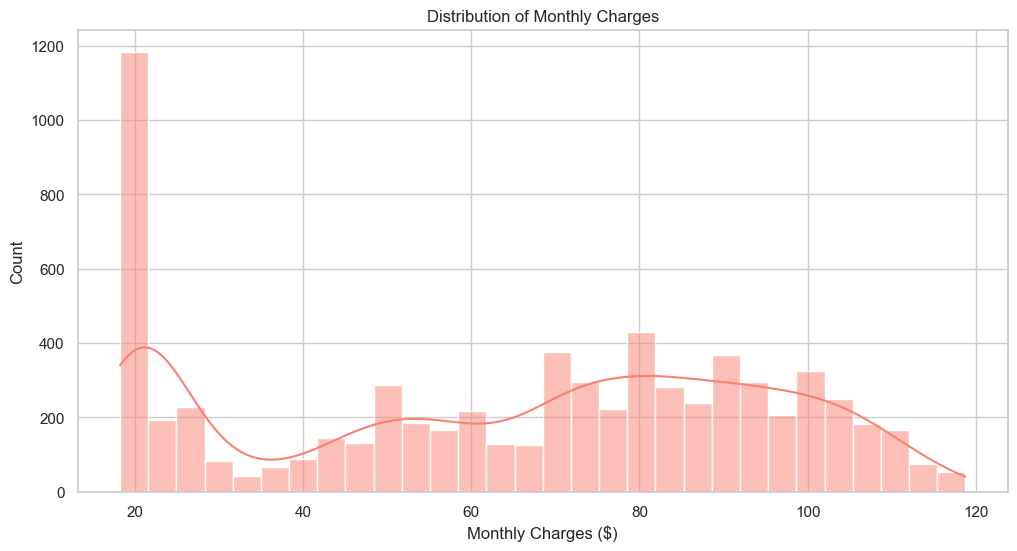

In [ ]:
#monthly Charges
plt.figure(figsize=(12, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

C:\Users\svani\AppData\Local\Temp\ipykernel_30996\4292993757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='pastel')
C:\Users\svani\AppData\Local\Temp\ipykernel_30996\4292993757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='pastel')


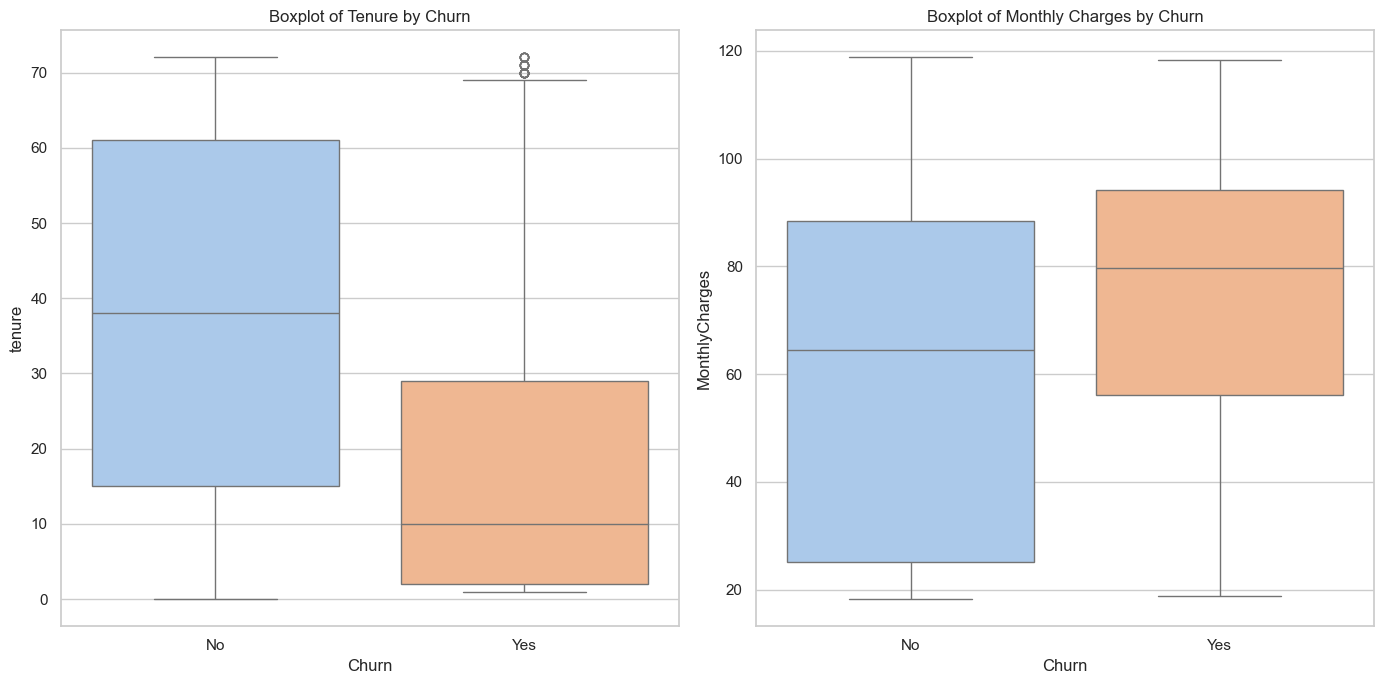

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=data, palette='pastel')
plt.title('Boxplot of Tenure by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='pastel')
plt.title('Boxplot of Monthly Charges by Churn')

plt.tight_layout()
plt.show()

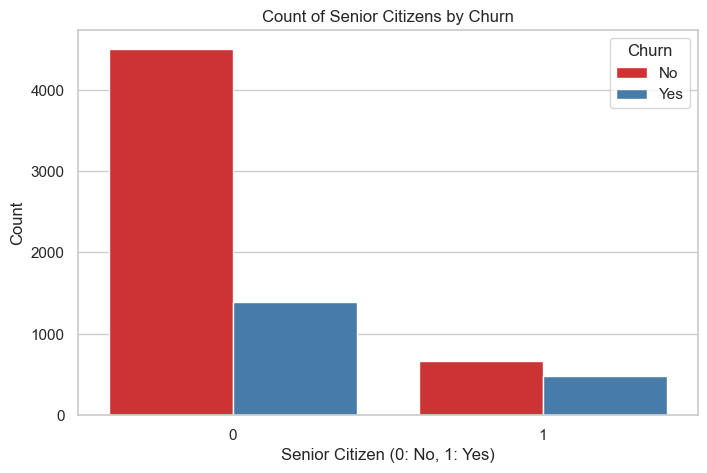

In [ ]:
# Countplot for 'SeniorCitizen'
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='Set1')
plt.title('Count of Senior Citizens by Churn')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


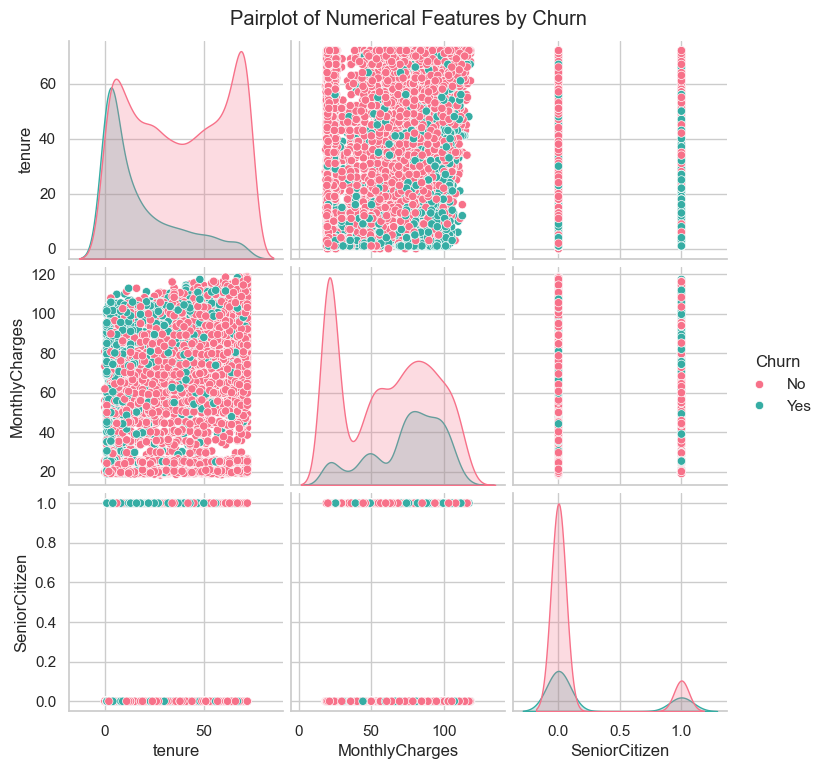

In [ ]:
# Pairplot for numerical features
sns.pairplot(data[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Churn']], hue='Churn', palette='husl')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

# Getting the Information of data:

In [ ]:
# Information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#  Check for missing values

In [ ]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
data.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Exploration

In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
data = data.drop('customerID', axis=1)

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

# Data Transformation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data['gender'].unique()

array([0, 1])

In [ ]:
data['Partner'].unique()

array([1, 0])

In [ ]:
data['Dependents'].unique()

array([0, 1])

In [ ]:
data['PhoneService'].unique()

array([0, 1])

In [ ]:
data['MultipleLines'].unique()

array([1, 0, 2])

In [ ]:
data['InternetService'].unique()

array([0, 1, 2])

In [ ]:
data['OnlineSecurity'].unique()

array([0, 2, 1])

In [ ]:
data['OnlineBackup'].unique()

array([2, 0, 1])

In [ ]:
data['DeviceProtection'].unique()

array([0, 2, 1])

In [ ]:
data['TechSupport'].unique()

array([0, 2, 1])

In [ ]:
data['StreamingTV'].unique()

array([0, 2, 1])

In [ ]:
data['StreamingMovies'].unique()

array([0, 2, 1])

In [ ]:
data['Contract'].unique()

array([0, 1, 2])

In [ ]:
data['PaperlessBilling'].unique()

array([1, 0])

In [ ]:
data['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [ ]:
data['Churn'].unique()

array([0, 1])

# After the transformation

# Model Selection and Training

#  Split the data into features (X) and target variable (y) and also Splitting into Training and Testing sets:

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,0,0,43,0,1,0,0,0,2,0,2,2,0,1,0,49.05,2076.20
3410,1,0,0,0,3,1,0,0,0,0,0,0,2,0,0,0,1,53.40,188.70
5483,0,0,1,0,55,1,2,1,0,0,2,0,0,0,0,1,2,77.75,4458.15
5524,1,0,1,1,45,1,0,0,2,0,0,2,0,0,2,0,0,54.65,2553.70
6337,0,0,1,1,55,1,2,1,2,0,0,0,2,2,1,0,3,100.90,5448.60


In [ ]:
y_train.head()

6030    1
3410    1
5483    1
5524    0
6337    0
Name: Churn, dtype: int32

# Model Selected is Random Forest Classifier is trained:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluating the Model and here its is Achieving 79.25% Accuracy:

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 79.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[932 101]
 [191 183]]


# Fine Tuning the Model using randomized search and Gradient Boosting Classifier based on their HyperParameters:(Here it is Achieving 80.03%)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning using randomized search
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Getting the best parameters from the randomized search
best_params = random_search.best_params_

In [ ]:
print(best_params)

{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}


In [ ]:
# Using these best parameters to train the model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=42)

In [ ]:
# Fined Tuned Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", f"{accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}
Accuracy: 80.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix:
 [[945  88]
 [193 181]]


# Saving the Fine Tuned Model as a Joblib File:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

model = RandomForestClassifier(n_estimators=100, max_depth=10)  # Replace with your actual model
print("Fine-tuned model has been saved.")

Fine-tuned model has been saved.


# Testing with unseen data

# creating my own data for predictions

In [ ]:
# Sample new data
new_data = {
    'gender': [0, 1, 0, 1, 0],
    'SeniorCitizen': [0, 0, 1, 0, 0],
    'Partner': [0, 1, 0, 1, 1],
    'Dependents': [1, 0, 0, 1, 1],
    'tenure': [43, 3, 55, 45, 55],
    'PhoneService': [0, 1, 1, 1, 1],
    'MultipleLines': [1, 0, 2, 0, 2],
    'InternetService': [0, 0, 1, 0, 2],
    'OnlineSecurity': [0, 0, 0, 2, 0],
    'OnlineBackup': [0, 0, 0, 0, 0],
    'DeviceProtection': [2, 0, 2, 0, 0],
    'TechSupport': [0, 0, 0, 2, 0],
    'StreamingTV': [2, 0, 0, 0, 2],
    'StreamingMovies': [2, 0, 0, 0, 2],
    'Contract': [0, 0, 1, 0, 2],
    'PaperlessBilling': [1, 0, 1, 0, 1],
    'PaymentMethod': [0, 1, 0, 2, 3],
    'MonthlyCharges': [49.05, 53.40, 77.75, 54.65, 100.90],
    'TotalCharges': [2076.20, 188.70, 4458.15, 2553.70, 5448.60]
}

# Create a DataFrame with the original data
original_data = pd.DataFrame(new_data)

In [ ]:
original_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# Creating a new column for displaying the Predicted Churn

In [ ]:
predictions_new = best_model.predict(original_data)
original_data['PredictedChurn'] = predictions_new
original_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PredictedChurn
0,0,0,0,1,43,0,1,0,0,0,2,0,2,2,0,1,0,49.05,2076.20,0
1,1,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,1,53.40,188.70,1
2,0,1,0,0,55,1,2,1,0,0,2,0,0,0,1,1,0,77.75,4458.15,0
3,1,0,1,1,45,1,0,0,2,0,0,2,0,0,0,0,2,54.65,2553.70,0
4,0,0,1,1,55,1,2,2,0,0,0,0,2,2,2,1,3,100.90,5448.60,0


# Dropping the input_columns to see the output predicted by our model

In [ ]:
original_data.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],axis=1)

,PredictedChurn
0,0
1,1
2,0
3,0
4,0


# END